# Advertising - logistic regression
we will using a fake dataset in this project.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [190]:
df=pd.read_csv('advertising.csv')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [192]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [193]:
df.drop(['Ad Topic Line','City','Country','Timestamp'], axis=1,inplace=True)
df.columns = ['DailyTimeSpentonSite','Age','AreaIncome','DailyInternetUsage','Male','Clicked']

# VISUALIZATION

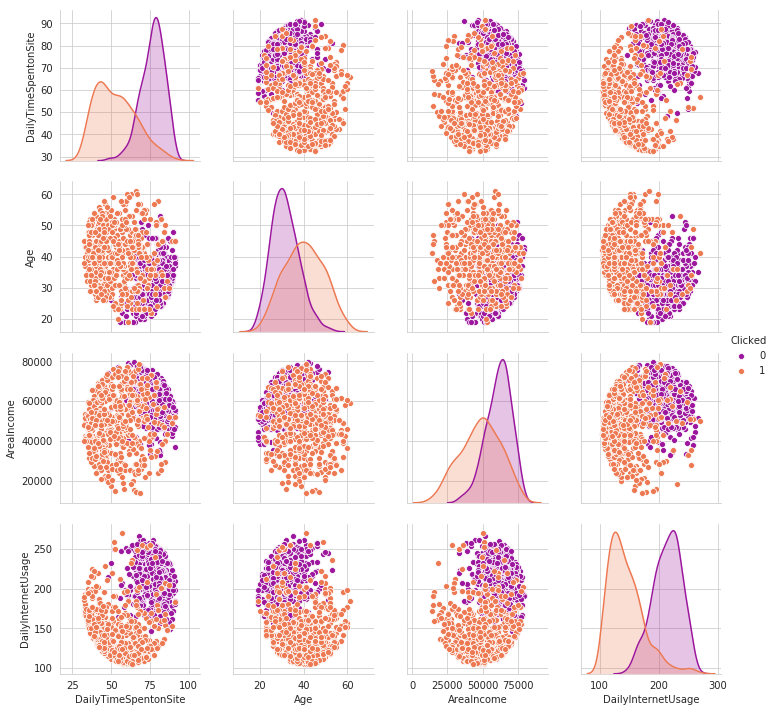

In [195]:
g = sns.pairplot(df, vars=['DailyTimeSpentonSite','Age','AreaIncome','DailyInternetUsage'], hue='Clicked', palette="plasma")

## correlation

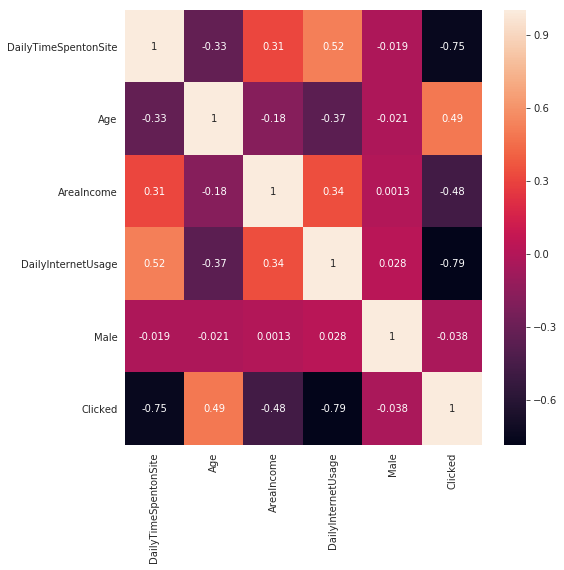

In [196]:
plt.rcParams['figure.figsize']=8,8
sns.heatmap(df.corr(),annot=True)
plt.show()

# MACHINE LEARNING

In [ ]:
df.head(5)

Text(0, 0.5, 'Frequency')

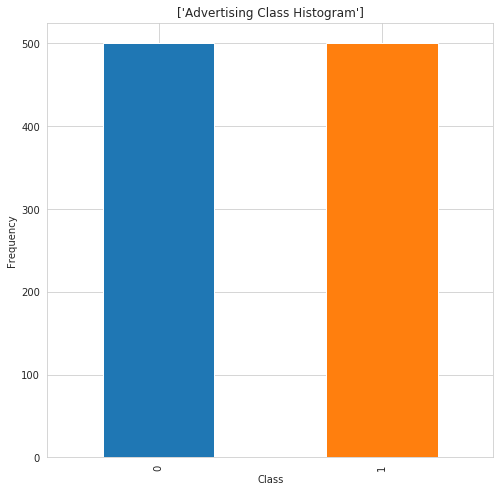

In [198]:
# Check the target class
countClass = pd.value_counts(df['Clicked'], sort=True).sort_index()
countClass.plot(kind='bar')
plt.title(['Advertising Class Histogram'])
plt.xlabel('Class')
plt.ylabel('Frequency')

### Clearly the data is totally balanced

# DATA PREPROCESSING

## 1. Split data into X and y

In [260]:
X = df.iloc[:,:-1].values
y = df.iloc[:,5:6].values

## 2. Split data into train test

In [261]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, stratify=y, test_size=0.25,random_state=0)

## 3.Normalizing

In [257]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()

Xtrain[:,:4] = Sc.fit_transform(Xtrain[:,:4])
Xtest[:,:4] = Sc.fit_transform(Xtest[:,:4])

# Choosing the regularization parameter lambda/ c

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer,confusion_matrix, precision_recall_curve, auc, roc_auc_score,roc_curve,recall_score, classification_report

In [307]:
def getOptC(X,y):
    c_param_range=[0.01, 0.1, 1, 10, 100]
    for c_param in c_param_range:
        print('----------------------------')
        print('C parameter', c_param)
        print('')
        
        lr = LogisticRegression(C=c_param,penalty='l1')
        score = cross_val_score(lr, X,y, cv=5, scoring=make_scorer(recall_score))
        mscore = np.mean(score)
        print(score)
        print('\nmean recall score=', mscore)

In [308]:
getOptC(Xtrain, ytrain)

----------------------------
C parameter 0.01

[0.86666667 0.92       0.89333333 0.82666667 0.84      ]

mean recall score= 0.8693333333333333
----------------------------
C parameter 0.1

[0.89333333 0.93333333 0.90666667 0.84       0.86666667]

mean recall score= 0.8879999999999999
----------------------------
C parameter 1

[0.94666667 0.97333333 0.93333333 0.94666667 0.98666667]

mean recall score= 0.9573333333333334
----------------------------
C parameter 10

[0.94666667 0.97333333 0.96       0.94666667 0.98666667]

mean recall score= 0.9626666666666667
----------------------------
C parameter 100

[0.94666667 0.97333333 0.96       0.96       0.98666667]

mean recall score= 0.9653333333333333


## the optimum C param = 10

# TRAINING & PREDICTING DATA

In [321]:
logreg = LogisticRegression(C=10, penalty='l1')
logreg.fit(Xtrain,ytrain)
ypred = logreg.predict(Xtest)

# MODEL EVALUATION

In [322]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    sns.set_style('white')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 1. Confusion Matrix

Recall = 0.91
Precision = 0.97
Accuracy= 0.94


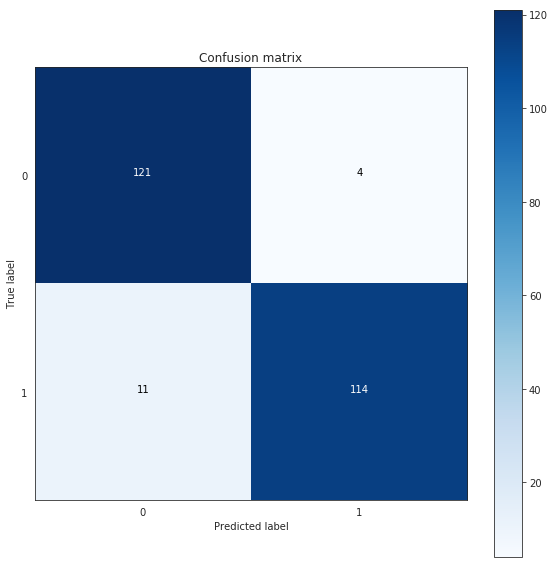

In [323]:
cm = confusion_matrix(ytest,ypred)

#bukan make index untuk akses confusion matrix. 
print("Recall =", round(cm[1,1]/(cm[1,0]+cm[1,1]),2))
print("Precision =",round(cm[1,1]/(cm[0,1]+cm[1,1]),2))
print("Accuracy=",(cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[1,0]+cm[0,1]) )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [324]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       125
           1       0.97      0.91      0.94       125

   micro avg       0.94      0.94      0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



# 2. ROC Curve

ROC AUC= 94.0 %


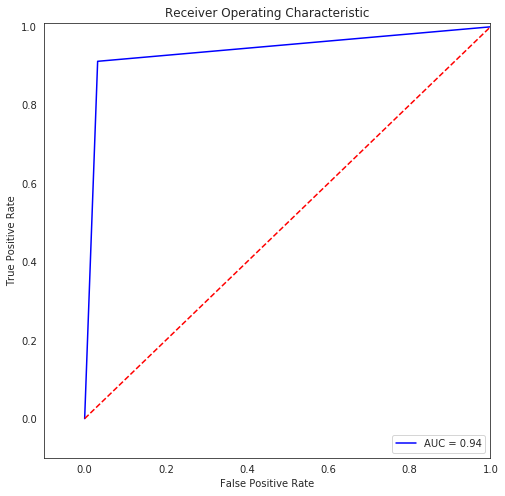

In [325]:
fpr, tpr, thresholds = roc_curve(ytest,ypred)
roc_auc = auc(fpr,tpr)

print('ROC AUC=',roc_auc*100,'%')
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# 3. Learning Curve
C=10, penalty=l1

In [397]:
def trainingData(Xtrain,Xtest,ytrain,ytest,reg,pen):
    logreg = LogisticRegression(C=reg, penalty=pen)
    logreg.fit(Xtrain,ytrain)
    ytestpred = logreg.predict(Xtest)
    ytrainpred = logreg.predict(Xtrain)
    
    cmTrain = confusion_matrix(ytrain,ytrainpred)
    cmVal = confusion_matrix(ytest,ytestpred)
    
    accuracyTrain = (cmTrain[1,1]+cmTrain[0,0])/(cmTrain[1,1]+cmTrain[0,0]+cmTrain[1,0]+cmTrain[0,1])
    accuracyVal = (cmVal[1,1]+cmVal[0,0])/(cmVal[1,1]+cmVal[0,0]+cmVal[1,0]+cmVal[0,1])
    
    eTrain = 100-accuracyTrain
    eVal = 100-accuracyVal
    
    return(eTrain,eVal)

In [398]:
def learningCurve2(X,y,reg,pen):
    size = np.arange(0.05,0.96,0.05)
    
    errorTrain = np.zeros((len(size),1))
    errorVal = np.zeros((len(size),1))
    
    Xtrainlist=[]

    for n,i in enumerate(size,0):
        
        Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,stratify=y, test_size=i)
        
        eTrain, eVal = trainingData(Xtrain,Xtest,ytrain,ytest,reg,pen)
        errorTrain[n] = eTrain
        errorVal[n] = eVal
        Xtrainlist.append(len(Xtrain))
        Xtestlist.append(len(Xtest))
        
    return(errorTrain,errorVal,size,Xtrainlist)

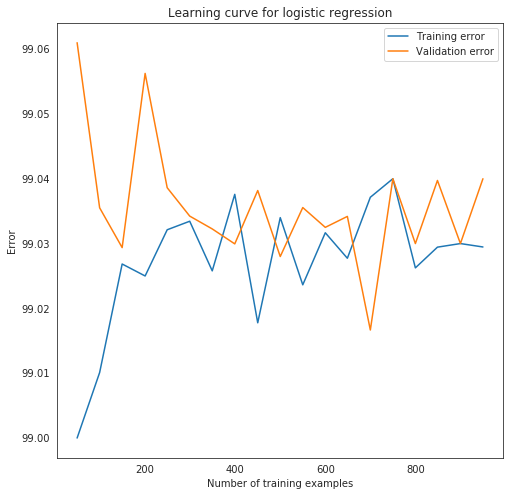

In [429]:
t_error,v_error,size,Xtrainlist = learningCurve2(X, y,10, 'l1')

plt.plot(Xtrainlist, t_error, label='Training error')
plt.plot(Xtrainlist, v_error, label='Validation error')
plt.title('Learning curve for logistic regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

In [430]:
d = {'Num Data Train': Xtrainlist,'Train Error': t_error.ravel(),'Val Error': v_error.ravel()}
df = pd.DataFrame(data=d)
df.sort_values(by='Val Error', ascending=False)

,Num Data Train,Train Error,Val Error
18,49,99.000000,99.060988
15,200,99.025000,99.056250
4,750,99.040000,99.040000
0,950,99.029474,99.040000
2,849,99.029446,99.039735
14,249,99.032129,99.038615
10,450,99.017778,99.038182
8,550,99.023636,99.035556
17,99,99.010101,99.035516
13,299,99.033445,99.034237


# the optimal number of training set = 750, test_size = 0.25